# Компьютерное зрение: Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.
Необходимо построить модель, которая по фотографии определит приблизительный возраст человека. 

В распоряжении имеется набор фотографий людей с указанием возраста.


План выполнения проекта:
   1. Анализ данных о возрасте людей. Изучение размера выборки. Анализ распределения возраста в выборке;
   2. Анализ фотографий и изучение устройства датасета;
   3. обучение модели;
   4. Анализ обученной модели. Вывод о ее пригодности для решения поставленных задач.

## Исследовательский анализ данных

### Загрузка библиотек

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image

### Анализ данных о возрасте

In [2]:
main_directory = '/datasets/faces/' # Путь ко всем данным
labels = pd.read_csv(main_directory + 'labels.csv')

In [3]:
def check_df (df, df_name):
    print()
    print(f'\033[1mОбзор датасета {df_name}:\033[0m')
    print()

    # общая информация 
    df.info()

    # первые 5 строк
    display(df.head())
    
    # статистическое описание
    display(df.describe())
    
    print('Кол-во пропусков:\n', df.isna().sum())

    print(f'\033[1mЧисло явных дубликатов в датасете {df_name} равно {df.duplicated().sum()}')
    
    plt.figure(figsize=(9,5))
    
    plt.hist(df[df.select_dtypes(['number']).columns], bins=90)
    plt.title('Распределение возрастов в данных')
    plt.xlabel('Возраст')
    plt.ylabel('Количество')
    
    plt.tight_layout()
    plt.show()


Обзор датасета labels:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


Кол-во пропусков:
 file_name    0
real_age     0
dtype: int64
Число явных дубликатов в датасете labels равно 0


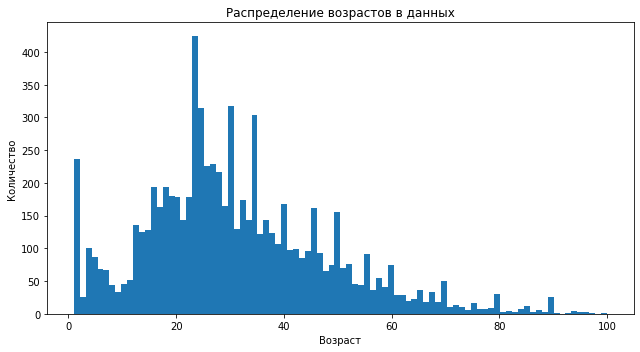

In [4]:
check_df(labels, 'labels')

- Данные с названием фыотографий и возрастом людей загружены успешно;
- В данных содержится 7591 строк и 2 столбца: `file_name` - название файла, `real_age` - возраст человека на фото. Пропуски и дубликаты в данных отсутствуют, типы данных корректны;
- Средний возраст представленных людей составляет 31.2 года, медианный - 29 лет. 75% людей имеют возраст 41 год или меньше;
- На гистограмме с распределением людей по возрасту наблюдается заметный всплеск около 25 лет. Кроме того, существенное число фотографий людей с возрастом около 30, 35, а также 1-годовалых детей. Самый возрастной человек на фото имеет возраст 100 лет.

### Анализ изображений

Номер изображения: 0
Название файла: 000000.jpg
Возраст человека: 4 лет
Размер изображения: (114, 114, 3)


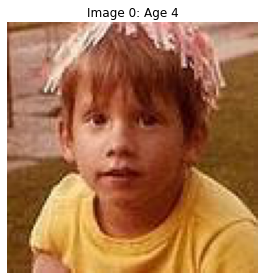


Номер изображения: 1
Название файла: 000001.jpg
Возраст человека: 18 лет
Размер изображения: (784, 784, 3)


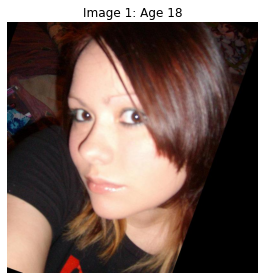


Номер изображения: 2
Название файла: 000002.jpg
Возраст человека: 80 лет
Размер изображения: (133, 133, 3)


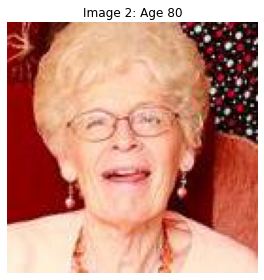


Номер изображения: 3
Название файла: 000003.jpg
Возраст человека: 50 лет
Размер изображения: (370, 370, 3)


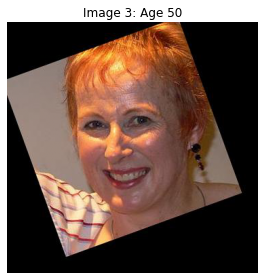


Номер изображения: 4
Название файла: 000004.jpg
Возраст человека: 17 лет
Размер изображения: (212, 212, 3)


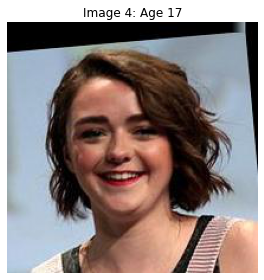


Номер изображения: 5
Название файла: 000005.jpg
Возраст человека: 27 лет
Размер изображения: (636, 637, 3)


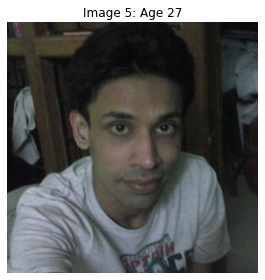


Номер изображения: 6
Название файла: 000006.jpg
Возраст человека: 24 лет
Размер изображения: (412, 412, 3)


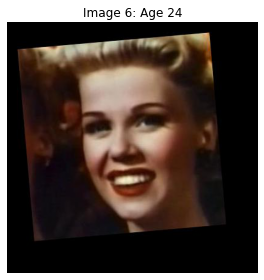


Номер изображения: 7
Название файла: 000007.jpg
Возраст человека: 43 лет
Размер изображения: (311, 311, 3)


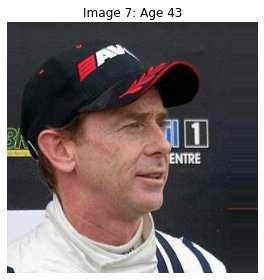


Номер изображения: 8
Название файла: 000008.jpg
Возраст человека: 26 лет
Размер изображения: (898, 897, 3)


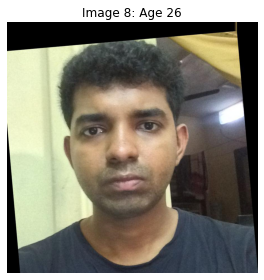


Номер изображения: 9
Название файла: 000009.jpg
Возраст человека: 39 лет
Размер изображения: (724, 724, 3)


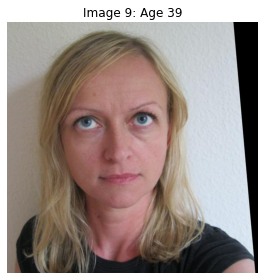


Номер изображения: 10
Название файла: 000010.jpg
Возраст человека: 17 лет
Размер изображения: (636, 636, 3)


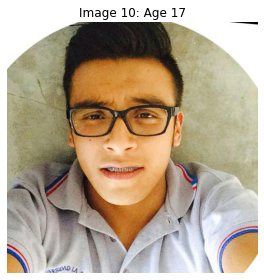


Номер изображения: 11
Название файла: 000011.jpg
Возраст человека: 51 лет
Размер изображения: (803, 803, 3)


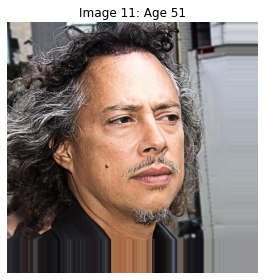


Номер изображения: 12
Название файла: 000012.jpg
Возраст человека: 2 лет
Размер изображения: (155, 155, 3)


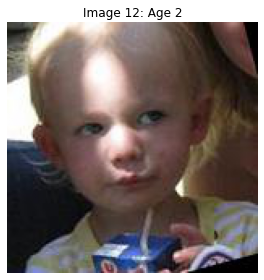


Номер изображения: 13
Название файла: 000013.jpg
Возраст человека: 1 лет
Размер изображения: (321, 321, 3)


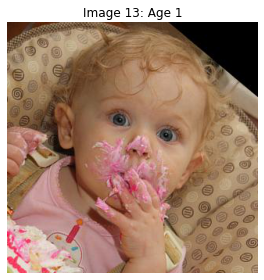


Номер изображения: 14
Название файла: 000014.jpg
Возраст человека: 6 лет
Размер изображения: (203, 204, 3)


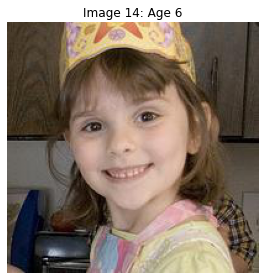

In [5]:
for i in range(0, 15):
    print('Номер изображения:', i)
    print('Название файла:', labels.loc[i, 'file_name'])
    print('Возраст человека:', labels.loc[i, 'real_age'], 'лет')
    
    # Загрузка изображения
    if i < 10:
        image = Image.open(f'{main_directory}final_files/00000{i}.jpg')
    else:
        image = Image.open(f'{main_directory}final_files/0000{i}.jpg')
    
    array = np.array(image) / 255
    
    print('Размер изображения:', array.shape)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(array)
    plt.title(f"Image {i}: Age {labels.loc[i, 'real_age']}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print()

- Данные состоят из изображений людей разного размера, но одинаковой формы - квадратные. Все изображения имеют 3 цветовых канала - `RGB`. Каждая фотография представляет собой отдельный файл с разрешением `.jpg`.
- Стоит отметить, что фотографии достаточно высокого качество, лицо людей на фотографиях хорошо различимо и занимает бОльшую часть изображения. Однако, заметно, что некоторые фотографии искажены поворотами и наличием ненужных боковых рамок. Таким образом, аугментации в виде приближения, смещения и поворотов могут улучшить качество обучения нейронной сети и захватить лица с разных ракурсов;
- Все просмотренные фотографии размечены корректно. Указанный возраст всех людей совпадает с их внешностью. Это говорит о высоком качестве данных и их пригодности для обучения нейронных сетей

## Обучение модели

Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке

```python

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from tensorflow import keras
import pandas as pd

def load_train(path):
    
    datagen = ImageDataGenerator(
        rescale=1/255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25,
        brightness_range=[0.7, 1.3])  

    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe = pd.read_csv(path + 'labels.csv'),
        directory = path + '/final_files',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size=(224, 224),
        batch_size=16,  
        subset='training',
        class_mode='raw',
        seed=12345)
    
    return train_datagen_flow

def load_test(path):
    datagen = ImageDataGenerator(
        rescale=1/255.,
        validation_split=0.25)

    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe = pd.read_csv(path + 'labels.csv'),
        directory = path + '/final_files',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size=(224, 224),
        batch_size=16,  
        subset='validation',
        class_mode='raw',
        seed=12345)
    
    return test_datagen_flow


def create_model(input_shape=(224, 224, 3)):
    backbone = ResNet50(
        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
        include_top=False,
        input_shape=input_shape)
    
    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        
        Dense(1)])
    
    optimizer = Adam(
        learning_rate=0.00003,
        amsgrad=False)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae'])

    model.summary() 
    
    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=50, steps_per_epoch=None, validation_steps=None):
    callbacks = [
        EarlyStopping(
            monitor='val_mae',
            patience=15,
        ),
        ReduceLROnPlateau(
            monitor='val_mae',
            factor=0.5,
        )
    ]
    
    history = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        verbose=2,
        shuffle=True
    )
    
    return model

```

**Результат обучения нейронной сети:**

```
# 2025-08-08 19:25:03.152744: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2025-08-08 19:25:03.154450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2025-08-08 19:25:04.037191: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-08-08 19:25:04.046419: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-08-08 19:25:04.046484: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-08 19:25:04.046515: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-08 19:25:04.048346: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-08-08 19:25:04.048685: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-08-08 19:25:04.050697: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-08-08 19:25:04.051861: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-08-08 19:25:04.051923: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-08-08 19:25:04.054795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2025-08-08 19:25:04.226339: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-08-08 19:25:04.232550: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2025-08-08 19:25:04.233119: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3d169e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-08-08 19:25:04.233144: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-08-08 19:25:04.379845: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3572d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-08 19:25:04.379880: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2025-08-08 19:25:04.381560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-08-08 19:25:04.381617: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-08 19:25:04.381626: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-08 19:25:04.381654: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-08-08 19:25:04.381664: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-08-08 19:25:04.381673: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-08-08 19:25:04.381681: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-08-08 19:25:04.381688: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-08-08 19:25:04.384894: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2025-08-08 19:25:04.384956: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-08 19:25:04.701781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-08-08 19:25:04.701830: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2025-08-08 19:25:04.701838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2025-08-08 19:25:04.705059: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-08-08 19:25:04.705104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
=================================================================
Total params: 24,779,649
Trainable params: 24,720,897
Non-trainable params: 58,752
_________________________________________________________________
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/50
2025-08-08 19:25:16.084333: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-08 19:25:16.375734: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 115s - loss: 1230.4570 - mae: 31.6276 - val_loss: 1257.2469 - val_mae: 31.2393
Epoch 2/50
356/356 - 107s - loss: 1130.9511 - mae: 31.4359 - val_loss: 1143.2591 - val_mae: 31.6688
Epoch 3/50
356/356 - 107s - loss: 1088.4811 - mae: 31.1372 - val_loss: 956.4426 - val_mae: 29.2638
Epoch 4/50
356/356 - 110s - loss: 1058.9167 - mae: 30.8613 - val_loss: 935.6561 - val_mae: 28.8378
Epoch 5/50
356/356 - 113s - loss: 1024.3422 - mae: 30.5403 - val_loss: 989.3107 - val_mae: 29.9072
Epoch 6/50
356/356 - 111s - loss: 997.5872 - mae: 30.1622 - val_loss: 983.6906 - val_mae: 29.5011
Epoch 7/50
356/356 - 112s - loss: 964.3615 - mae: 29.7414 - val_loss: 1067.3182 - val_mae: 31.1482
Epoch 8/50
356/356 - 112s - loss: 932.9669 - mae: 29.2528 - val_loss: 991.5775 - val_mae: 30.0276
Epoch 9/50
356/356 - 112s - loss: 894.4700 - mae: 28.6905 - val_loss: 795.5788 - val_mae: 26.7014
Epoch 10/50
356/356 - 111s - loss: 854.9209 - mae: 28.0644 - val_loss: 855.7609 - val_mae: 27.7961
Epoch 11/50
356/356 - 112s - loss: 814.4562 - mae: 27.3728 - val_loss: 837.0411 - val_mae: 27.5034
Epoch 12/50
356/356 - 111s - loss: 769.4390 - mae: 26.6027 - val_loss: 664.8796 - val_mae: 24.1448
Epoch 13/50
356/356 - 107s - loss: 724.6081 - mae: 25.7732 - val_loss: 657.1285 - val_mae: 24.0582
Epoch 14/50
356/356 - 108s - loss: 677.2427 - mae: 24.8904 - val_loss: 580.0530 - val_mae: 22.4424
Epoch 15/50
356/356 - 114s - loss: 628.9662 - mae: 23.9332 - val_loss: 404.3174 - val_mae: 18.2557
Epoch 16/50
356/356 - 114s - loss: 580.7800 - mae: 22.9378 - val_loss: 546.1520 - val_mae: 21.5586
Epoch 17/50
356/356 - 111s - loss: 531.9137 - mae: 21.8789 - val_loss: 492.4810 - val_mae: 20.2807
Epoch 18/50
356/356 - 109s - loss: 483.3796 - mae: 20.7783 - val_loss: 500.7264 - val_mae: 20.5381
Epoch 19/50
356/356 - 107s - loss: 438.2770 - mae: 19.6399 - val_loss: 507.2961 - val_mae: 20.6134
Epoch 20/50
356/356 - 111s - loss: 391.7901 - mae: 18.5002 - val_loss: 434.7913 - val_mae: 18.8940
Epoch 21/50
356/356 - 115s - loss: 347.9514 - mae: 17.3104 - val_loss: 243.6663 - val_mae: 13.4236
Epoch 22/50
356/356 - 107s - loss: 306.6459 - mae: 16.1054 - val_loss: 337.8969 - val_mae: 16.4817
Epoch 23/50
356/356 - 108s - loss: 267.3922 - mae: 14.9019 - val_loss: 216.0152 - val_mae: 12.5645
Epoch 24/50
356/356 - 108s - loss: 231.7949 - mae: 13.7179 - val_loss: 202.5819 - val_mae: 12.0248
Epoch 25/50
356/356 - 107s - loss: 200.4969 - mae: 12.5410 - val_loss: 191.3152 - val_mae: 11.2788
Epoch 26/50
356/356 - 107s - loss: 168.5627 - mae: 11.3368 - val_loss: 190.5711 - val_mae: 11.3861
Epoch 27/50
356/356 - 106s - loss: 143.4201 - mae: 10.2504 - val_loss: 159.4383 - val_mae: 10.2151
Epoch 28/50
356/356 - 103s - loss: 120.3989 - mae: 9.2751 - val_loss: 99.0953 - val_mae: 7.5494
Epoch 29/50
356/356 - 105s - loss: 102.2050 - mae: 8.3300 - val_loss: 102.1584 - val_mae: 7.5667
Epoch 30/50
356/356 - 107s - loss: 85.6182 - mae: 7.5338 - val_loss: 110.5931 - val_mae: 8.0238
Epoch 31/50
356/356 - 106s - loss: 73.7919 - mae: 6.8881 - val_loss: 104.2027 - val_mae: 7.7607
Epoch 32/50
356/356 - 108s - loss: 64.8581 - mae: 6.3632 - val_loss: 126.1820 - val_mae: 8.5179
Epoch 33/50
356/356 - 112s - loss: 57.8248 - mae: 6.0075 - val_loss: 90.7888 - val_mae: 7.0859
Epoch 34/50
356/356 - 115s - loss: 51.3763 - mae: 5.6413 - val_loss: 81.9587 - val_mae: 6.7716
Epoch 35/50
356/356 - 115s - loss: 46.9845 - mae: 5.3837 - val_loss: 93.6426 - val_mae: 6.9885
Epoch 36/50
356/356 - 115s - loss: 44.9308 - mae: 5.2597 - val_loss: 81.3507 - val_mae: 6.5534
Epoch 37/50
356/356 - 115s - loss: 42.4927 - mae: 5.1472 - val_loss: 78.4511 - val_mae: 6.4306
Epoch 38/50
356/356 - 109s - loss: 41.9172 - mae: 5.0451 - val_loss: 93.8843 - val_mae: 7.2204
Epoch 39/50
356/356 - 113s - loss: 41.0730 - mae: 5.0275 - val_loss: 76.3148 - val_mae: 6.5576
Epoch 40/50
356/356 - 111s - loss: 40.0127 - mae: 4.9841 - val_loss: 80.6724 - val_mae: 6.6628
Epoch 41/50
356/356 - 105s - loss: 38.9920 - mae: 4.9159 - val_loss: 76.5902 - val_mae: 6.4253
Epoch 42/50
356/356 - 107s - loss: 38.5169 - mae: 4.9156 - val_loss: 73.4892 - val_mae: 6.3557
Epoch 43/50
356/356 - 105s - loss: 39.0726 - mae: 4.9117 - val_loss: 89.1178 - val_mae: 6.7146
Epoch 44/50
356/356 - 103s - loss: 37.7466 - mae: 4.8262 - val_loss: 75.8343 - val_mae: 6.6002
Epoch 45/50
356/356 - 103s - loss: 38.3827 - mae: 4.8659 - val_loss: 75.8447 - val_mae: 6.4331
Epoch 46/50
356/356 - 103s - loss: 36.8417 - mae: 4.7953 - val_loss: 77.0963 - val_mae: 6.4018
Epoch 47/50
356/356 - 103s - loss: 36.3741 - mae: 4.7453 - val_loss: 75.3833 - val_mae: 6.5004
Epoch 48/50
356/356 - 104s - loss: 36.1896 - mae: 4.7466 - val_loss: 75.4419 - val_mae: 6.2574
Epoch 49/50
356/356 - 109s - loss: 35.8332 - mae: 4.7329 - val_loss: 81.4207 - val_mae: 6.6377
Epoch 50/50
356/356 - 108s - loss: 35.4529 - mae: 4.6779 - val_loss: 76.2232 - val_mae: 6.5035
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 76.2232 - mae: 6.5035

```

## Анализ обученной модели

- Итоговый вариант нейронной сети состоит из архитекруры ResNet50, глобального AveragePooling и чередования слоев регуляризации (`Dropout`), нормализации BatchNorm и полносвязных слоев (`Dense`) с функцией активации `ReLu`. Последним слоем является полносвязный слой с одним нейроном, что продиктовано типом задачи (регрессия). Нейронная сеть обучалась на 50 эпохах;
- Метрикой качества нейронной сети была выбрана `Mean Absolute Error`. Функция потерь - `Mean Squared Error` - выбрана для ускорения обучения. Метрика качества обученной модели составила 6.5, что удовлетворяет поставленной задаче `MAE < 8`. Таким образом, средняя ошибка предсказания возраста людей по фотографии составляет 6.5 лет;

- Учитывая получившееся качество модели, ее можно с уверенностью использовать для определения возрастной группы покупателя с целью подбора рекомендаций товаров и настройки персональных предложений; 
- Однако, не рекомендуется применять данную модель при принятии решения о продаже алкоголя. Ошибка в 6.5 лет модет быть критичной в данном случае и приведет к лишним проблемам. При продаже алкоголя стоит продолжить требовать предъявления удостоверения личности покупателя. 